# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import datetime as dt
from matplotlib import pyplot as plt

# 1.0 Load Data

Datasets downloaded from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/UBIG3F

## 1.1 voter detail

In [2]:
# load each file and combine into a single dataframe
path = r'/Users/jleland/Desktop/voter/FL_voter/20170207_VoterDetail'
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, 
                     sep='\t', 
                     header=None,
                     names=['county_code', 'voter_id', 'name_last', 'name_suffix', 
                            'name_first', 'name_middle', 'requested_public_records_exemption',
                           'residence_address_line_1', 'residence_address_line_2', 'residence_city',
                           'residence_state', 'residence_zipcode', 'mailing_address_line_1,',
                           'mailing_address_line_2', 'mailing_address_line_3', 'mailing_city',
                           'mailing_state', 'mailing_zipcode', 'mailing_country', 'gender', 'race',
                           'birth_date', 'registration_date', 'party_affiliation', 'precinct',
                           'precinct_group', 'precinct_split', 'precinct_suffix', 'voter_status',
                           'congressional_district', 'house_district', 'senate_district',
                           'county_commission_district', 'school_board_district', 'daytime_area_code',
                           'daytime_phone_number', 'daytime_phone_extension', 'email_address'])
    li.append(df)

detail = pd.concat(li, axis=0, ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (11,14,17,18,27,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# convert date fields from object dtype to datetime
date_cache = {k: pd.to_datetime(k, errors='coerce') for k in detail['birth_date'].unique()}
detail['birth_date'] = detail['birth_date'].map(date_cache)

date_cache = {k: pd.to_datetime(k, errors='coerce') for k in detail['registration_date'].unique()}
detail['registration_date'] = detail['registration_date'].map(date_cache)

In [4]:
detail.head()

,county_code,voter_id,name_last,name_suffix,name_first,name_middle,requested_public_records_exemption,residence_address_line_1,residence_address_line_2,residence_city,...,voter_status,congressional_district,house_district,senate_district,county_commission_district,school_board_district,daytime_area_code,daytime_phone_number,daytime_phone_extension,email_address
0,CHA,102654245,Nodes,NaN,Melvin,R,N,8320 Riverside DR,UNIT 4179,Punta Gorda,...,ACT,17.0,75.0,26.0,1.0,1.0,941,5056229,NaN,
1,CHA,116777380,Oldbear,NaN,Kaili,Nicole,N,5016 Palangos DR,,Punta Gorda,...,ACT,17.0,75.0,26.0,1.0,1.0,NaN,NaN,NaN,KAILINICOLE@ROCKETMAIL.COM
2,CHA,111684516,Dunn,NaN,Cora,M,N,23053 Westchester BLVD,APT L501,Port Charlotte,...,ACT,17.0,75.0,26.0,1.0,1.0,NaN,NaN,NaN,
3,CHA,121565689,Espino,NaN,Melissa,Faye,N,2511 Luther RD,APT 225,Punta Gorda,...,ACT,17.0,75.0,26.0,1.0,1.0,NaN,NaN,NaN,
4,CHA,113812700,Eno,NaN,Camille,Marie,N,24437 Harborview RD,LOT 19,Port Charlotte,...,ACT,17.0,75.0,26.0,1.0,1.0,863,7098529,NaN,


In [5]:
detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13710358 entries, 0 to 13710357
Data columns (total 38 columns):
county_code                           object
voter_id                              int64
name_last                             object
name_suffix                           object
name_first                            object
name_middle                           object
requested_public_records_exemption    object
residence_address_line_1              object
residence_address_line_2              object
residence_city                        object
residence_state                       object
residence_zipcode                     object
mailing_address_line_1,               object
mailing_address_line_2                object
mailing_address_line_3                object
mailing_city                          object
mailing_state                         object
mailing_zipcode                       object
mailing_country                       object
gender                         

## 1.2 voter history

In [6]:
# load files and combine into single dataframe
path = r'/Users/jleland/Desktop/voter/FL_voter/20170207_VoterHistory'
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, 
                     sep='\t', 
                     header=None,
                     names=['county_code', 'voter_id', 'election_date', 'election_type', 'history_code'])
    li.append(df)

hist = pd.concat(li, axis=0, ignore_index=True)

In [7]:
# convert date field from object dtype to datetime
date_cache = {k: pd.to_datetime(k) for k in hist['election_date'].unique()}
hist['election_date'] = hist['election_date'].map(date_cache)

In [8]:
hist.head()

,county_code,voter_id,election_date,election_type,history_code
0,PIN,100021934,2016-11-08,GEN,Y
1,PIN,100021442,2007-03-13,OTH,Y
2,PIN,100047465,2014-03-11,GEN,Y
3,PIN,100046570,2008-11-04,GEN,A
4,PIN,100052464,2014-11-04,GEN,Y


In [9]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72770189 entries, 0 to 72770188
Data columns (total 5 columns):
county_code      object
voter_id         int64
election_date    datetime64[ns]
election_type    object
history_code     object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.7+ GB


# 2.0 Check for fake birthdays

Look for fake birthdays by identifying a month/day with a high # of occurrences (e.g. many voters reported their birthday on 1/1)

In [10]:
# count the number of birthday occurences on each day of the year
bd = detail[['voter_id','birth_date']]
bd.loc[:,'day'] = detail.birth_date.dt.day
bd.loc[:,'month'] = detail.birth_date.dt.month
bd_count = pd.DataFrame(bd.groupby(['month','day']).voter_id.count().sort_values(ascending=False).rename('count')).reset_index()

df_p = pd.pivot_table(bd_count,'count','month','day')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
df_p.head()

day,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
month,,,,,,,,,,,,,,,,,,,,,
1.0,39229.0,35041.0,36307.0,36768.0,36710.0,37133.0,36564.0,36241.0,35919.0,37303.0,...,36554.0,36424.0,36529.0,36845.0,36678.0,36354.0,36805.0,36147.0,36244.0,35645.0
2.0,37163.0,38034.0,36823.0,36502.0,36955.0,36178.0,36935.0,36771.0,36644.0,37816.0,...,37529.0,36434.0,36807.0,36506.0,36476.0,36514.0,37554.0,8540.0,NaN,NaN
3.0,37407.0,37158.0,38005.0,36913.0,37110.0,36800.0,36620.0,36908.0,36185.0,36953.0,...,35856.0,35917.0,36074.0,36466.0,35705.0,35944.0,35826.0,35149.0,35410.0,35109.0
4.0,36061.0,35883.0,35365.0,36521.0,35716.0,35560.0,35825.0,35523.0,35213.0,36099.0,...,35136.0,35116.0,34917.0,35474.0,34632.0,34743.0,35784.0,35031.0,34722.0,NaN
5.0,36482.0,35337.0,35033.0,34931.0,36820.0,35349.0,35389.0,35463.0,34890.0,36120.0,...,35558.0,35347.0,35159.0,35865.0,35171.0,35170.0,35555.0,35306.0,34291.0,34107.0


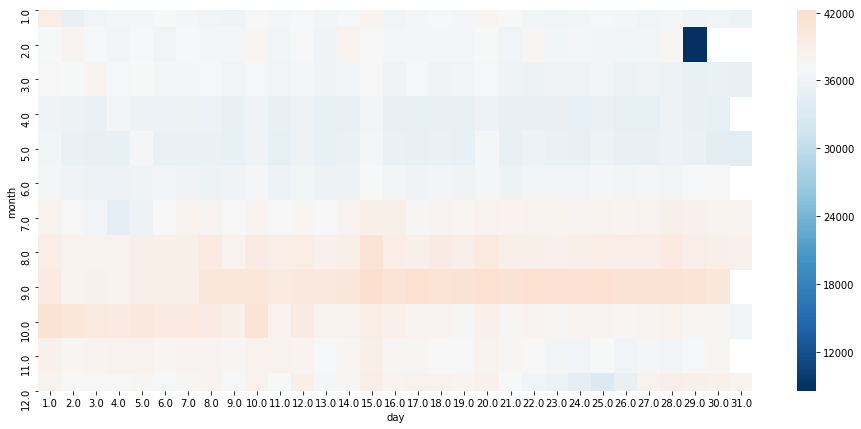

In [12]:
plt.figure(figsize=(16, 7))
sns.heatmap(df_p, cmap="RdBu_r", center=bd_count['count'].mean())

The only date that stands out as an outlier is February 29th, which is expected b/c it only occurrs on a leap year

# 3.0 Prepare Dataset for Analysis

## 3.1 Limit dataset to Primary and General Elections with 100k votes

In [13]:
# remove rows from voter history where history_code='N' b/c these are people who did not vote
hist = hist[hist.history_code !='N']

# limit voter history dataset to Primary and General elections with at least 100k votes, so that after the cartesian join below the size of the dataframe is manageable
elections = pd.DataFrame(hist.groupby(['election_date','election_type']).county_code.count()).reset_index()
elections = elections[(elections.county_code > 1000000) & (elections.election_type.isin(['GEN','PRI']))][['election_date', 'election_type']]
hist = hist.merge(elections, how='inner', left_on=['election_date','election_type'], right_on=['election_date','election_type'])

# remove dupes from voter history
hist.drop_duplicates(subset=['voter_id', 'election_date','election_type'], inplace=True)

## 3.2 Cartesian product registration detail and election_date-election_type

In [16]:
# get cartesian product of elections with voter registration detail, so primary key = voter_id-election_date-election_type
elections['key'] = 1
detail['key'] = 1

df = detail[['voter_id', 'birth_date', 'registration_date', 'key']].merge(elections, left_on='key', right_on='key')
df.drop('key', inplace=True, axis=1)

In [17]:
# remove rows where registration_date > election_date b/c these voters were not eligible to vote (<18 years old or not registered)
df = df[df.registration_date <= df.election_date]

## 3.3 Left join on voter history

In [18]:
# left join on hist to determine if the voter_id voted in that election_date-election_type
hist['voted'] = 1
df = df.merge(hist[['voter_id','election_date','election_type','voted']], how='left', left_on=['voter_id','election_date','election_type'], right_on=['voter_id','election_date','election_type'])

In [19]:
# create column for voted 0 = no
df['voted'] = df.voted.fillna(value=0)

In [20]:
# drop null birthdays
df.dropna(subset=['birth_date'], inplace=True)

In [21]:
df.shape

(122259442, 6)

## 3.4 Calc days between birth_date and election_date

In [22]:
# calculate the difference in number of days between birth_date and election_date
df['bd_day_of_month'] = df.birth_date.dt.day.astype(str)
df['bd_month_of_year'] = df.birth_date.dt.month.astype(str)
df['election_year'] = df.election_date.dt.year.astype(str)
df['birthday_election_year'] = pd.to_datetime(df['election_year'] + '-' + df['bd_month_of_year'] + '-' + df['bd_day_of_month'], errors='coerce')

df['days'] = (df['birthday_election_year'] - df['election_date']).dt.days

In [23]:
# check that where days==0, month/day of birth_date matches month/day of election_date
df[df.days==0].head()

,voter_id,birth_date,registration_date,election_date,election_type,voted,bd_day_of_month,bd_month_of_year,election_year,birthday_election_year,days
178,102543125,1925-11-07,1977-11-14,2006-11-07,GEN,1.0,7,11,2006,2006-11-07,0.0
675,102586405,1930-08-14,1995-02-21,2012-08-14,PRI,0.0,14,8,2012,2012-08-14,0.0
1462,102655195,1936-11-08,2003-11-20,2016-11-08,GEN,1.0,8,11,2016,2016-11-08,0.0
1614,102578136,1937-11-04,1992-12-02,2008-11-04,GEN,1.0,4,11,2008,2008-11-04,0.0
1620,102578136,1937-11-04,1992-12-02,2014-11-04,GEN,1.0,4,11,2014,2014-11-04,0.0


# 4.0 Analysis

In [130]:
# group by election_date-election_type-days_from_bday and calc voter turnout
turnout_groupby_days_from_bday = df.groupby(['election_date','election_type','days']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'voted', 'count': 'n_total', 'sum': 'n_voters'})
turnout_groupby_days_from_bday['n_nonvoters'] = turnout_groupby_days_from_bday.n_total - turnout_groupby_days_from_bday.n_voters
turnout_groupby_days_from_bday['voted'] = turnout_groupby_days_from_bday['voted']*100

# look at 50 days before and after birthday
turnout_groupby_days_from_bday = turnout_groupby_days_from_bday[turnout_groupby_days_from_bday.days.abs()<52]

# calculate the change in voter turnout from the previous day
turnout_change_from_prev_day = (turnout_groupby_days_from_bday.set_index(['election_date', 'election_type','days','n_total','n_voters','n_nonvoters']).diff()).reset_index()
turnout_change_from_prev_day = turnout_change_from_prev_day[turnout_change_from_prev_day.days.abs()<51]
turnout_change_from_prev_day.head()

,election_date,election_type,days,n_total,n_voters,n_nonvoters,voted
1,2006-09-05,PRI,-50.0,20363,4306.0,16057.0,0.223353
2,2006-09-05,PRI,-49.0,20546,4301.0,16245.0,-0.212681
3,2006-09-05,PRI,-48.0,20264,4221.0,16043.0,-0.103472
4,2006-09-05,PRI,-47.0,20669,4304.0,16365.0,-0.006588
5,2006-09-05,PRI,-46.0,20588,4327.0,16261.0,0.193642


## 4.1 Change in voter turnout from Prev Day - GEN & PRI

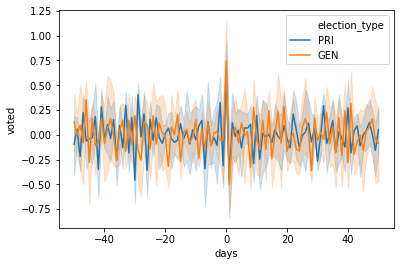

In [131]:
sns.lineplot(x='days', y='voted', hue='election_type',data=turnout_change_from_prev_day)

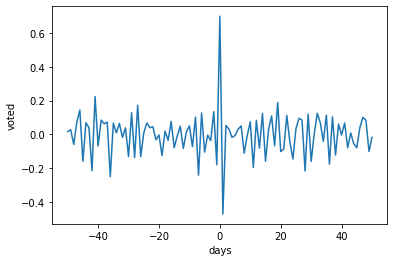

In [132]:
avg_change_from_prev_day = pd.DataFrame(turnout_change_from_prev_day.groupby('days').voted.mean())
sns.lineplot(x=avg_change_from_prev_day.index, y=avg_change_from_prev_day.voted)

### +/- 50 days avg absolute change from previous day

In [133]:
turnout_change_from_prev_day['days_grouped_50'] = np.where(turnout_change_from_prev_day.days<0, '-50', np.where(turnout_change_from_prev_day.days>0, '+50', '0'))
turnout_change_from_prev_day['voted_abs'] = turnout_change_from_prev_day.voted.abs()
turnout_change_from_prev_day.groupby('days_grouped_50').agg({'voted_abs': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

,voted_abs,n_total,n_voters,n_nonvoters
days_grouped_50,,,,
+50,0.303376,17355640,7098884.0,10256756.0
-50,0.292118,17509450,7351927.0,10157523.0
0,0.758129,344740,144093.0,200647.0


### +/- 30 days avg absolute change from previous day

In [134]:
turnout_change_from_prev_day_30 = turnout_change_from_prev_day[turnout_change_from_prev_day.days.abs() < 31]
turnout_change_from_prev_day_30['days_grouped_30'] = np.where(turnout_change_from_prev_day_30.days<0, '-30', np.where(turnout_change_from_prev_day_30.days>0, '+30', '0'))
turnout_change_from_prev_day_30.groupby('days_grouped_30').agg({'voted_abs': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,voted_abs,n_total,n_voters,n_nonvoters
days_grouped_30,,,,
+30,0.310689,10432638,4268047.0,6164591.0
-30,0.289921,10413112,4327077.0,6086035.0
0,0.758129,344740,144093.0,200647.0


### +/- 7 days avg absolute change from previous day

In [135]:
turnout_change_from_prev_day_7 = turnout_change_from_prev_day[turnout_change_from_prev_day.days.abs() < 8]
turnout_change_from_prev_day_7['days_grouped_7'] = np.where(turnout_change_from_prev_day_7.days<0, '-7', np.where(turnout_change_from_prev_day_7.days>0, '+7', '0'))
turnout_change_from_prev_day_7.groupby('days_grouped_7').agg({'voted_abs': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,voted_abs,n_total,n_voters,n_nonvoters
days_grouped_7,,,,
+7,0.330075,2421673,1001916.0,1419757.0
-7,0.315421,2416269,996087.0,1420182.0
0,0.758129,344740,144093.0,200647.0


### +/- 2 days change from previous day

In [137]:
turnout_change_from_prev_day[turnout_change_from_prev_day.days.isin([-2,-1,0,1,2])].groupby('days').agg({'voted': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

,voted,n_total,n_voters,n_nonvoters
days,,,,
-2.0,0.134241,345089,142497.0,202592.0
-1.0,-0.180355,345161,142228.0,202933.0
0.0,0.699600,344740,144093.0,200647.0
1.0,-0.471758,345006,142550.0,202456.0
2.0,0.052467,346576,142877.0,203699.0


## 4.2 Change in voter turnout from Prev Day - GEN Only

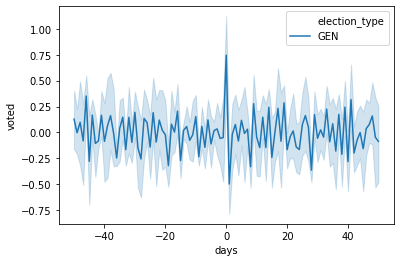

In [140]:
turnout_change_from_prev_day_GEN = turnout_change_from_prev_day[turnout_change_from_prev_day.election_type=='GEN']
sns.lineplot(x='days', y='voted', hue='election_type',data=turnout_change_from_prev_day_GEN)

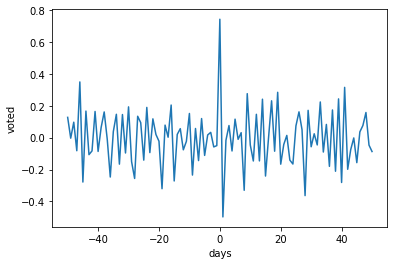

In [141]:
avg_change_from_prev_day_GEN = pd.DataFrame(turnout_change_from_prev_day_GEN.groupby('days').voted.mean())
sns.lineplot(x=avg_change_from_prev_day_GEN.index, y=avg_change_from_prev_day_GEN.voted)

### +/- 50 days avg absolute change from previous day

In [142]:
turnout_change_from_prev_day_GEN['days_grouped_50'] = np.where(turnout_change_from_prev_day_GEN.days<0, '-50', np.where(turnout_change_from_prev_day_GEN.days>0, '+50', '0'))
turnout_change_from_prev_day_GEN['voted_abs'] = turnout_change_from_prev_day_GEN.voted.abs()
turnout_change_from_prev_day_GEN.groupby('days_grouped_50').agg({'voted_abs': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,voted_abs,n_total,n_voters,n_nonvoters
days_grouped_50,,,,
+50,0.330159,8481594,5300847.0,3180747.0
-50,0.306987,8964708,5617951.0,3346757.0
0,0.855269,171776,108221.0,63555.0


### +/- 30 days avg absolute change from previous day

In [143]:
turnout_change_from_prev_day_30_GEN = turnout_change_from_prev_day_GEN[turnout_change_from_prev_day_GEN.days.abs() < 31]
turnout_change_from_prev_day_30_GEN['days_grouped_30'] = np.where(turnout_change_from_prev_day_30_GEN.days<0, '-30', np.where(turnout_change_from_prev_day_30_GEN.days>0, '+30', '0'))
turnout_change_from_prev_day_30_GEN.groupby('days_grouped_30').agg({'voted_abs': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,voted_abs,n_total,n_voters,n_nonvoters
days_grouped_30,,,,
+30,0.329353,5093176,3185611.0,1907565.0
-30,0.296561,5226471,3272552.0,1953919.0
0,0.855269,171776,108221.0,63555.0


### +/- 7 days avg absolute change from previous day

In [144]:
turnout_change_from_prev_day_7_GEN = turnout_change_from_prev_day_GEN[turnout_change_from_prev_day_GEN.days.abs() < 8]
turnout_change_from_prev_day_7_GEN['days_grouped_7'] = np.where(turnout_change_from_prev_day_7_GEN.days<0, '-7', np.where(turnout_change_from_prev_day_7_GEN.days>0, '+7', '0'))
turnout_change_from_prev_day_7_GEN.groupby('days_grouped_7').agg({'voted_abs': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,voted_abs,n_total,n_voters,n_nonvoters
days_grouped_7,,,,
+7,0.345727,1203589,753430.0,450159.0
-7,0.256472,1202142,750519.0,451623.0
0,0.855269,171776,108221.0,63555.0


### +/- 2 days change from previous day

In [145]:
turnout_change_from_prev_day_GEN[turnout_change_from_prev_day_GEN.days.isin([-2,-1,0,1,2])].groupby('days').agg({'voted': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

,voted,n_total,n_voters,n_nonvoters
days,,,,
-2.0,-0.057660,171296,106976.0,64320.0
-1.0,-0.049589,172406,107448.0,64958.0
0.0,0.744907,171776,108221.0,63555.0
1.0,-0.497714,171296,107202.0,64094.0
2.0,-0.016063,171266,107084.0,64182.0


## 4.3 Change in voter turnout from Prev Day - PRI Only

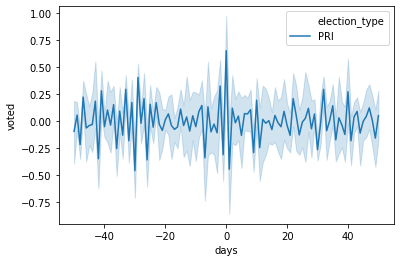

In [146]:
turnout_change_from_prev_day_PRI = turnout_change_from_prev_day[turnout_change_from_prev_day.election_type=='PRI']
sns.lineplot(x='days', y='voted', hue='election_type',data=turnout_change_from_prev_day_PRI)

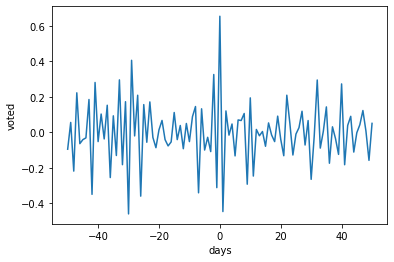

In [147]:
avg_change_from_prev_day_PRI = pd.DataFrame(turnout_change_from_prev_day_PRI.groupby('days').voted.mean())
sns.lineplot(x=avg_change_from_prev_day_PRI.index, y=avg_change_from_prev_day_PRI.voted)

### +/- 50 days avg absolute change from previous day

In [148]:
turnout_change_from_prev_day_PRI['days_grouped_50'] = np.where(turnout_change_from_prev_day_PRI.days<0, '-50', np.where(turnout_change_from_prev_day_PRI.days>0, '+50', '0'))
turnout_change_from_prev_day_PRI['voted_abs'] = turnout_change_from_prev_day_PRI.voted.abs()
turnout_change_from_prev_day_PRI.groupby('days_grouped_50').agg({'voted_abs': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,voted_abs,n_total,n_voters,n_nonvoters
days_grouped_50,,,,
+50,0.276594,8874046,1798037.0,7076009.0
-50,0.277248,8544742,1733976.0,6810766.0
0,0.660989,172964,35872.0,137092.0


### +/- 30 days avg absolute change from previous day

In [149]:
turnout_change_from_prev_day_30_PRI = turnout_change_from_prev_day_PRI[turnout_change_from_prev_day_PRI.days.abs() < 31]
turnout_change_from_prev_day_30_PRI['days_grouped_30'] = np.where(turnout_change_from_prev_day_30_PRI.days<0, '-30', np.where(turnout_change_from_prev_day_30_PRI.days>0, '+30', '0'))
turnout_change_from_prev_day_30_PRI.groupby('days_grouped_30').agg({'voted_abs': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,voted_abs,n_total,n_voters,n_nonvoters
days_grouped_30,,,,
+30,0.292025,5339462,1082436.0,4257026.0
-30,0.283280,5186641,1054525.0,4132116.0
0,0.660989,172964,35872.0,137092.0


### +/- 7 days avg absolute change from previous day

In [150]:
turnout_change_from_prev_day_7_PRI = turnout_change_from_prev_day_PRI[turnout_change_from_prev_day_PRI.days.abs() < 8]
turnout_change_from_prev_day_7_PRI['days_grouped_7'] = np.where(turnout_change_from_prev_day_7_PRI.days<0, '-7', np.where(turnout_change_from_prev_day_7_PRI.days>0, '+7', '0'))
turnout_change_from_prev_day_7_PRI.groupby('days_grouped_7').agg({'voted_abs': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,voted_abs,n_total,n_voters,n_nonvoters
days_grouped_7,,,,
+7,0.314422,1218084,248486.0,969598.0
-7,0.374371,1214127,245568.0,968559.0
0,0.660989,172964,35872.0,137092.0


### +/- 2 days change from previous day

In [151]:
turnout_change_from_prev_day_PRI[turnout_change_from_prev_day_PRI.days.isin([-2,-1,0,1,2])].groupby('days').agg({'voted': 'mean', 'n_total': 'sum', 'n_voters': 'sum', 'n_nonvoters': 'sum'})

,voted,n_total,n_voters,n_nonvoters
days,,,,
-2.0,0.326142,173793,35521.0,138272.0
-1.0,-0.311122,172755,34780.0,137975.0
0.0,0.654294,172964,35872.0,137092.0
1.0,-0.445803,173710,35348.0,138362.0
2.0,0.120998,175310,35793.0,139517.0
